In [5]:
!pip install kagglehub
import kagglehub

In [6]:
# Download the dataset using kagglehub
path = kagglehub.dataset_download("mexwell/heart-disease-dataset")

# Print the path to the dataset files
print("Path to dataset files:", path)

100%|██████████| 399k/399k [00:00<00:00, 72.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mexwell/heart-disease-dataset/versions/2


In [8]:
import pandas as pd
import os

# Define the path where the dataset was downloaded
dataset_path = '/root/.cache/kagglehub/datasets/mexwell/heart-disease-dataset/versions/2'

# List the files in the dataset directory to confirm the correct file name
files = os.listdir(dataset_path)
print(f"Files in the dataset directory: {files}")

# Load the dataset into a DataFrame using the correct file name
df = pd.read_csv(os.path.join(dataset_path, 'heart_statlog_cleveland_hungary_final.csv'))  # Correct file name

# Display basic information about the dataset
df.info()

# Show the first few rows of the dataset
df.head()


Files in the dataset directory: ['heart_statlog_cleveland_hungary_final.csv', 'documentation.pdf']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238

Confusion Matrix:
[[ 98   9]
 [  4 127]]


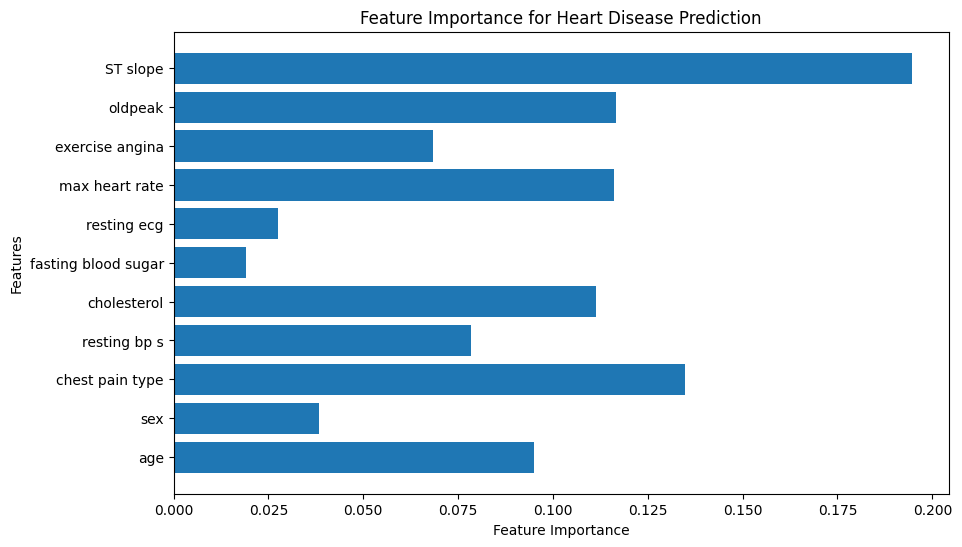

In [9]:
# Step 1: Data Preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check if any missing values exist (although it seems there are none)
print(df.isnull().sum())

# Features (X) and target (y)
X = df.drop('target', axis=1)  # Drop target column to get the features
y = df['target']  # Target is the 'target' column

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features (important for models like SVM, KNN, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train a Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 5: Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Step 6: Plot feature importance (optional, for better understanding of the model)
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Heart Disease Prediction')
plt.show()


COVID-19 GLOBAL Dataset

In [2]:
import os

# List the files in the dataset directory
dataset_dir = '/root/.cache/kagglehub/datasets/josephassaker/covid19-global-dataset/versions/56'
files = os.listdir(dataset_dir)

# Print the list of files
print(files)


['worldometer_coronavirus_daily_data.csv', 'worldometer_coronavirus_summary_data.csv']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184787 entries, 0 to 184786
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     184787 non-null  object 
 1   country                  184787 non-null  object 
 2   cumulative_total_cases   184787 non-null  float64
 3   daily_new_cases          174329 non-null  float64
 4   active_cases             166747 non-null  float64
 5   cumulative_total_deaths  178227 non-null  float64
 6   daily_new_deaths         157850 non-null  float64
dtypes: float64(5), object(2)
memory usage: 9.9+ MB
Mean Absolute Error (MAE): 3094.6789372543376


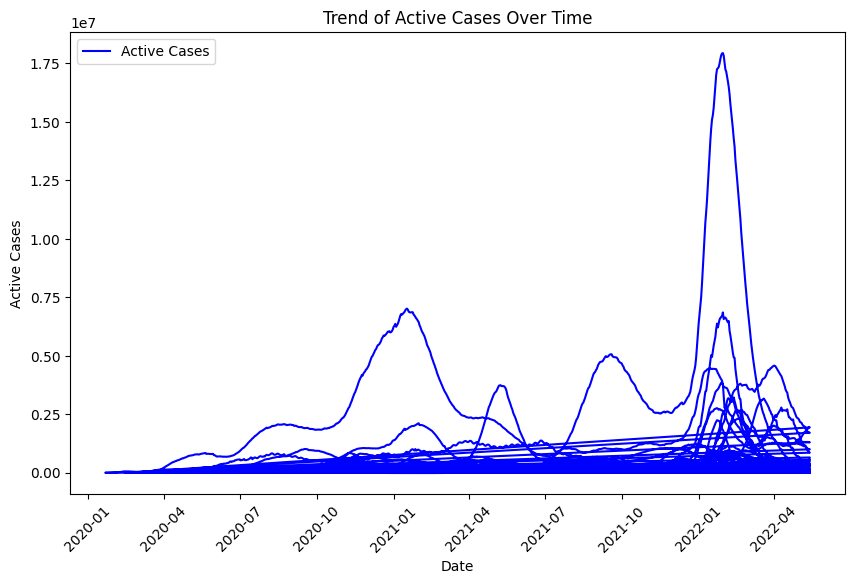

Correlation between active cases and daily new cases: 0.8108884235095402


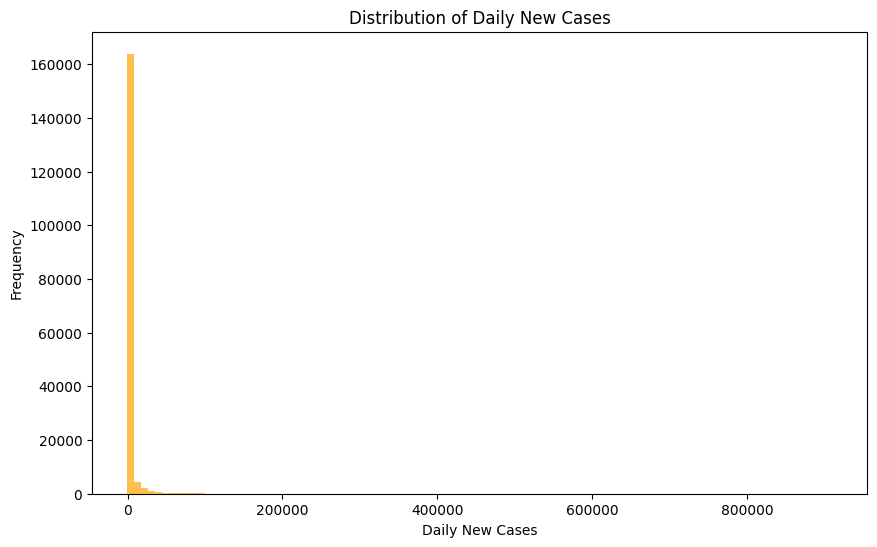

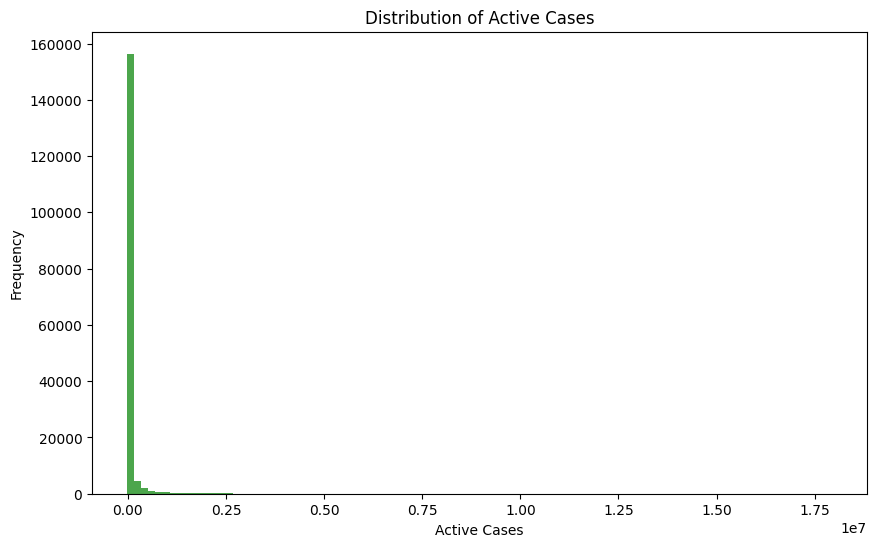

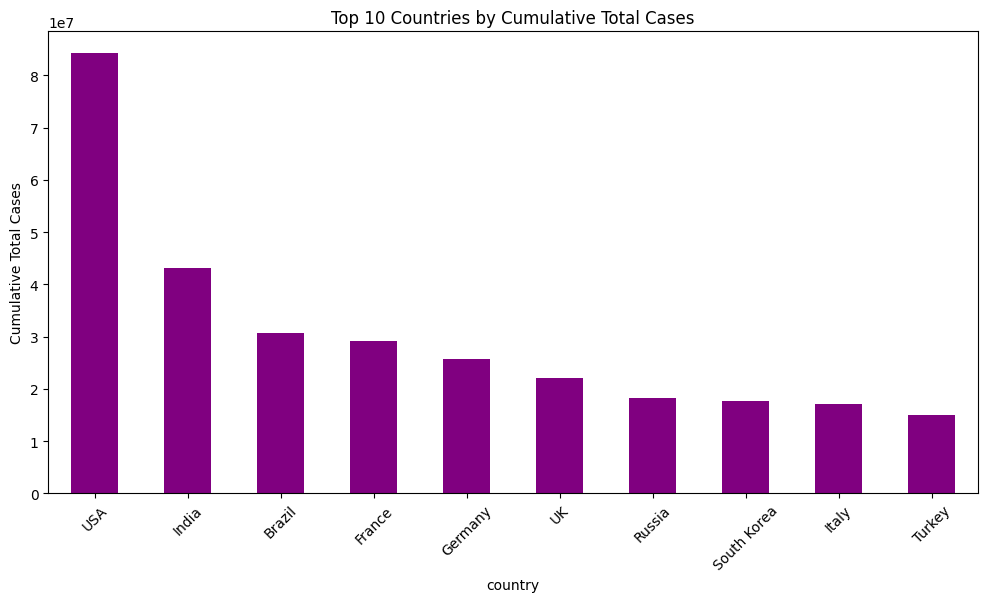

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Step 1: Load the dataset
dataset_file_path = '/root/.cache/kagglehub/datasets/josephassaker/covid19-global-dataset/versions/56/worldometer_coronavirus_daily_data.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(dataset_file_path)

# Step 2: Exploratory Data Analysis (EDA)

# Check for missing values and basic information
df.info()

# Summary statistics for numeric columns
df.describe()

# Check the first few rows of the dataset
df.head()

# Step 3: Predictive Analytics for Outbreak Prediction (Approach 2.3)

# Clean the data by dropping rows with missing values
df_clean = df.dropna(subset=['daily_new_cases', 'cumulative_total_cases'])

# Select the features and target
X = df_clean[['cumulative_total_cases']]  # Feature: cumulative cases
y = df_clean['daily_new_cases']  # Target: daily new cases

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Step 4: Telemedicine and Patient Health Monitoring (Approach 2.5)

# Convert the 'date' column to datetime format for easier plotting
df['date'] = pd.to_datetime(df['date'])

# Plot the trend of active cases over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['active_cases'], label='Active Cases', color='blue')
plt.title('Trend of Active Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Step 5: Resource Allocation (Approach 2.1)

# Check correlation between active cases and daily new cases
correlation = df['active_cases'].corr(df['daily_new_cases'])
print(f"Correlation between active cases and daily new cases: {correlation}")

# Step 6: Visualizing the Distribution of New Cases
# Visualizing the distribution of daily new cases
plt.figure(figsize=(10, 6))
plt.hist(df['daily_new_cases'], bins=100, color='orange', alpha=0.7)
plt.title('Distribution of Daily New Cases')
plt.xlabel('Daily New Cases')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of active cases
plt.figure(figsize=(10, 6))
plt.hist(df['active_cases'], bins=100, color='green', alpha=0.7)
plt.title('Distribution of Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('Frequency')
plt.show()

# Visualizing the top 10 countries by cumulative cases
top_countries = df.groupby('country')['cumulative_total_cases'].max().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Top 10 Countries by Cumulative Total Cases')
plt.ylabel('Cumulative Total Cases')
plt.xticks(rotation=45)
plt.show()

# Step 7: Conclusion and Further Actions
# Based on the model and EDA, you can apply the following strategies:
# 1. **Predictive Analytics**: Train more sophisticated models (e.g., Random Forest, LSTM) to predict future outbreaks based on the data.
# 2. **Telemedicine**: Use the active cases plot to monitor the ongoing pandemic and deploy telemedicine services where needed.
# 3. **Resource Allocation**: Use the correlation between active and new cases to forecast resource needs like ICU beds and ventilators.


<ipython-input-4-ffc3be2935e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['active_case_diff'] = country_df['active_cases'].diff()


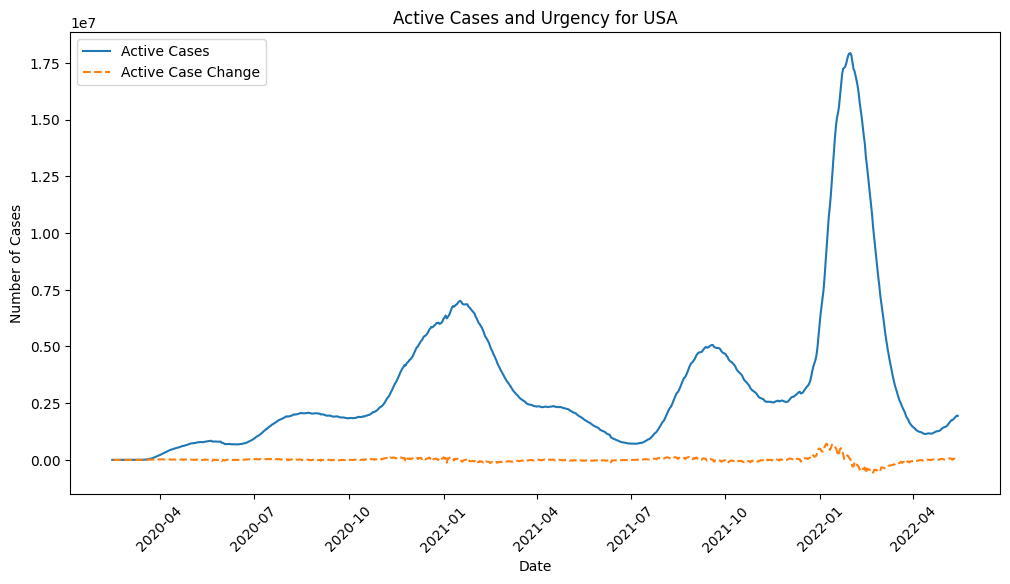

In [4]:
# Example: Monitoring regions with high active cases and daily new cases
country = 'USA'  # For example, change to any country you're interested in
country_df = df[df['country'] == country]

# Identify the dates with significant increases in active cases
country_df['active_case_diff'] = country_df['active_cases'].diff()

# Plotting active cases and intervention urgency
plt.figure(figsize=(12, 6))
plt.plot(country_df['date'], country_df['active_cases'], label='Active Cases')
plt.plot(country_df['date'], country_df['active_case_diff'], label='Active Case Change', linestyle='--')
plt.title(f'Active Cases and Urgency for {country}')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.show()


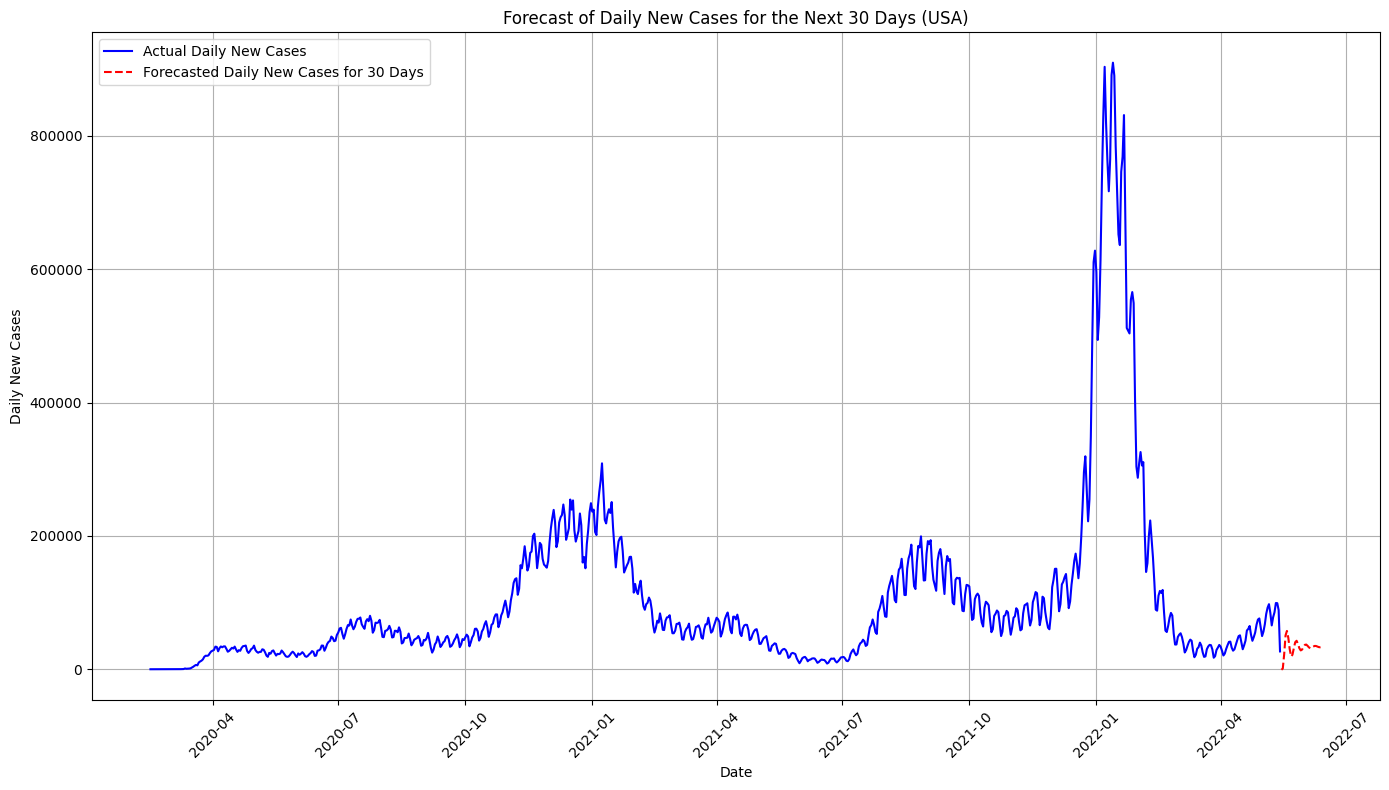

Forecasted Daily New Cases for the next 30 days:
           Forecasted Cases
2022-05-15              NaN
2022-05-16              NaN
2022-05-17              NaN
2022-05-18              NaN
2022-05-19              NaN
2022-05-20              NaN
2022-05-21              NaN
2022-05-22              NaN
2022-05-23              NaN
2022-05-24              NaN
2022-05-25              NaN
2022-05-26              NaN
2022-05-27              NaN
2022-05-28              NaN
2022-05-29              NaN
2022-05-30              NaN
2022-05-31              NaN
2022-06-01              NaN
2022-06-02              NaN
2022-06-03              NaN
2022-06-04              NaN
2022-06-05              NaN
2022-06-06              NaN
2022-06-07              NaN
2022-06-08              NaN
2022-06-09              NaN
2022-06-10              NaN
2022-06-11              NaN
2022-06-12              NaN
2022-06-13              NaN


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Load your dataframe (assuming 'df' is already loaded with the dataset)
df['date'] = pd.to_datetime(df['date'])  # Ensure date column is in datetime format

# Focus on a specific country (e.g., USA) for modeling
country_df = df[df['country'] == 'USA']

# Set 'date' as the index and ensure daily frequency ('D')
country_df.set_index('date', inplace=True)
country_df = country_df.asfreq('D')

# Train an ARIMA model for forecasting daily new cases
train_data = country_df['daily_new_cases'].dropna()

# Define ARIMA model (p, d, q) parameters - these should be optimized, here we use (5,1,0) as an example
model = ARIMA(train_data, order=(5, 1, 0))  # ARIMA model parameters
model_fit = model.fit()

# Forecast for the next 30 days (you can increase or decrease as needed)
forecast_days = 30
forecast = model_fit.forecast(steps=forecast_days)

# Plot forecast vs actual data
plt.figure(figsize=(14, 8))
plt.plot(train_data, label='Actual Daily New Cases', color='blue')

# Create the date range for the forecast
forecast_dates = pd.date_range(train_data.index[-1] + timedelta(days=1), periods=forecast_days, freq='D')

plt.plot(forecast_dates, forecast, label=f'Forecasted Daily New Cases for {forecast_days} Days', color='red', linestyle='--')

plt.title(f'Forecast of Daily New Cases for the Next {forecast_days} Days (USA)')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Optional: Print forecast values
print(f"Forecasted Daily New Cases for the next {forecast_days} days:")
print(pd.DataFrame(forecast, index=forecast_dates, columns=['Forecasted Cases']))


In [8]:
from pmdarima import auto_arima

# Automatically find the best ARIMA model for the data
model_auto = auto_arima(train_data, seasonal=False, stepwise=True, trace=True)

# Print the best model
print(f"Best ARIMA model: {model_auto.summary()}")

# Forecast for the next 30 days
forecast_auto = model_auto.predict(n_periods=30)

# Plot the forecast
plt.figure(figsize=(14, 8))
plt.plot(train_data, label='Actual Daily New Cases', color='blue')
plt.plot(forecast_dates, forecast_auto, label=f'Forecasted Daily New Cases (Auto ARIMA)', color='red', linestyle='--')
plt.title(f'Forecast of Daily New Cases for the Next 30 Days (USA)')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'pmdarima'